# Diabetic readmission

# Step 1: Data Preprocessing

PCA for feature engineering  - Junxue

Missing values / imputation or deletion - Zoe 

Dummy conversion - James

Oversampling the readmission within 30 days to correct the imbalancing - Sandra (edited) 

DATAPROCESSING done by 11/23

In [1]:
#! pip install matplotlib
#! pip install xgboost

In [2]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt  

# import needed libraries for models
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.inspection import permutation_importance
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

In [3]:
# set pandas options so we see all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
### Merging didn't work
# pip install nbmerge

#!nbmerge james.ipynb pca.ipynb missing.ipynb > merged.ipynb

# Unreadable Notebook: C:\Users\sandr\Box Sync\MScA\31009 
# Machine Learning\Group project\merged.ipynb NotJSONError("Notebook does not appear to be JSON: ''...")

# Import

In [5]:
data = pd.read_csv('diabetic_data.csv')

data.describe(include='all')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [6]:
data['weight'].value_counts()

# Too many missing values - drop

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

In [7]:
data['payer_code'].value_counts()

# Too many missing values - drop

?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: payer_code, dtype: int64

# Missing values

In [8]:
data = data.drop(columns = ['weight','payer_code'])
data = data.dropna(subset=['encounter_id','patient_nbr','race','gender','age',
                           'admission_type_id','discharge_disposition_id',
                           'admission_source_id','time_in_hospital','max_glu_serum',
                           'A1Cresult','metformin','repaglinide','nateglinide',
                           'chlorpropamide','glimepiride','acetohexamide','glipizide',
                           'glyburide','tolbutamide','pioglitazone','rosiglitazone',
                           'acarbose','miglitol','troglitazone','tolazamide','examide',
                           'citoglipton','insulin','glyburide-metformin',
                           'glipizide-metformin','glimepiride-pioglitazone',
                           'metformin-rosiglitazone','metformin-pioglitazone','change',
                           'diabetesMed','readmitted'])

In [9]:
data['Numeric_diag_1'] = pd.to_numeric(data['diag_1'], errors='coerce')
mask = data['Numeric_diag_1'].isna()
data.loc[mask, 'FreeText_diag_1'] = data.loc[mask, 'diag_1']
data = data.drop(columns=['diag_1'])

In [10]:
data['Numeric_diag_2'] = pd.to_numeric(data['diag_2'], errors='coerce')
mask = data['Numeric_diag_2'].isna()
data.loc[mask, 'FreeText_diag_2'] = data.loc[mask, 'diag_2']
data = data.drop(columns=['diag_2'])

In [11]:
data['Numeric_diag_3'] = pd.to_numeric(data['diag_3'], errors='coerce')
mask = data['Numeric_diag_3'].isna()
data.loc[mask, 'FreeText_diag_3'] = data.loc[mask, 'diag_3']
data = data.drop(columns=['diag_3'])

In [12]:
data['Numeric_diag_1'] = data['Numeric_diag_1'].fillna(data['Numeric_diag_1'].mean())
data['Numeric_diag_2'] = data['Numeric_diag_2'].fillna(data['Numeric_diag_2'].mean())
data['Numeric_diag_3'] = data['Numeric_diag_3'].fillna(data['Numeric_diag_3'].mean())

In [13]:
data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Numeric_diag_1,FreeText_diag_1,Numeric_diag_2,FreeText_diag_2,Numeric_diag_3,FreeText_diag_3
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,Pediatrics-Endocrinology,41,0,1,0,0,0,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,250.83,NaN,438.674883,?,418.179285,?
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,?,59,0,18,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,276.00,NaN,250.010000,NaN,255.000000,NaN
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,?,11,5,13,2,0,1,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,648.00,NaN,250.000000,NaN,418.179285,V27
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,?,44,1,16,0,0,0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,8.00,NaN,250.430000,NaN,403.000000,NaN
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,?,51,0,8,0,0,0,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,197.00,NaN,157.000000,NaN,250.000000,NaN


# Dummies

In [14]:
# look at dataset as a whole
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101766 entries, 0 to 101765
Data columns (total 51 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   encounter_id              101766 non-null  int64  
 1   patient_nbr               101766 non-null  int64  
 2   race                      101766 non-null  object 
 3   gender                    101766 non-null  object 
 4   age                       101766 non-null  object 
 5   admission_type_id         101766 non-null  int64  
 6   discharge_disposition_id  101766 non-null  int64  
 7   admission_source_id       101766 non-null  int64  
 8   time_in_hospital          101766 non-null  int64  
 9   medical_specialty         101766 non-null  object 
 10  num_lab_procedures        101766 non-null  int64  
 11  num_procedures            101766 non-null  int64  
 12  num_medications           101766 non-null  int64  
 13  number_outpatient         101766 non-null  i

In [15]:
# drop encounter id and patient number fields since they do not provide any value to model
data_prep = data.drop(['encounter_id'],axis=1)
# data_prep = data_prep.drop(['patient_nbr'],axis=1) # dropped above

# look at new data processing dataframe
data_prep.head()

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Numeric_diag_1,FreeText_diag_1,Numeric_diag_2,FreeText_diag_2,Numeric_diag_3,FreeText_diag_3
0,8222157,Caucasian,Female,[0-10),6,25,1,1,Pediatrics-Endocrinology,41,0,1,0,0,0,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,250.83,NaN,438.674883,?,418.179285,?
1,55629189,Caucasian,Female,[10-20),1,1,7,3,?,59,0,18,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,276.00,NaN,250.010000,NaN,255.000000,NaN
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,?,11,5,13,2,0,1,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,648.00,NaN,250.000000,NaN,418.179285,V27
3,82442376,Caucasian,Male,[30-40),1,1,7,2,?,44,1,16,0,0,0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,8.00,NaN,250.430000,NaN,403.000000,NaN
4,42519267,Caucasian,Male,[40-50),1,1,7,1,?,51,0,8,0,0,0,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,197.00,NaN,157.000000,NaN,250.000000,NaN


In [16]:
# look at race feature values
data_prep['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [17]:
# drop records from race where there ia ?
data_prep = data_prep[data_prep['race'] != '?'] 

In [18]:
# look at race feature values
data_prep['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [19]:
# one hot encode race column
data_prep = pd.get_dummies(data_prep, columns=['race'])

# look at data
data_prep.head()

,patient_nbr,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Numeric_diag_1,FreeText_diag_1,Numeric_diag_2,FreeText_diag_2,Numeric_diag_3,FreeText_diag_3,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other
0,8222157,Female,[0-10),6,25,1,1,Pediatrics-Endocrinology,41,0,1,0,0,0,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,250.83,NaN,438.674883,?,418.179285,?,0,0,1,0,0
1,55629189,Female,[10-20),1,1,7,3,?,59,0,18,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,276.00,NaN,250.010000,NaN,255.000000,NaN,0,0,1,0,0
2,86047875,Female,[20-30),1,1,7,2,?,11,5,13,2,0,1,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,648.00,NaN,250.000000,NaN,418.179285,V27,1,0,0,0,0
3,82442376,Male,[30-40),1,1,7,2,?,44,1,16,0,0,0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,8.00,NaN,250.430000,NaN,403.000000,NaN,0,0,1,0,0
4,42519267,Male,[40-50),1,1,7,1,?,51,0,8,0,0,0,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,197.00,NaN,157.000000,NaN,250.000000,NaN,0,0,1,0,0


In [20]:
# look at gender feature values
data_prep['gender'].value_counts()

Female             53575
Male               45917
Unknown/Invalid        1
Name: gender, dtype: int64

In [21]:
# drop records from gender where there is Unknown/Invalid
data_prep = data_prep[data_prep['gender'] != 'Unknown/Invalid'] 

In [22]:
# look at gender feature values
data_prep['gender'].value_counts()

Female    53575
Male      45917
Name: gender, dtype: int64

In [23]:
# one hot encode gender column
data_prep = pd.get_dummies(data_prep, columns=['gender'])

# look at data
data_prep.head()

,patient_nbr,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Numeric_diag_1,FreeText_diag_1,Numeric_diag_2,FreeText_diag_2,Numeric_diag_3,FreeText_diag_3,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male
0,8222157,[0-10),6,25,1,1,Pediatrics-Endocrinology,41,0,1,0,0,0,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,250.83,NaN,438.674883,?,418.179285,?,0,0,1,0,0,1,0
1,55629189,[10-20),1,1,7,3,?,59,0,18,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,276.00,NaN,250.010000,NaN,255.000000,NaN,0,0,1,0,0,1,0
2,86047875,[20-30),1,1,7,2,?,11,5,13,2,0,1,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,648.00,NaN,250.000000,NaN,418.179285,V27,1,0,0,0,0,1,0
3,82442376,[30-40),1,1,7,2,?,44,1,16,0,0,0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,8.00,NaN,250.430000,NaN,403.000000,NaN,0,0,1,0,0,0,1
4,42519267,[40-50),1,1,7,1,?,51,0,8,0,0,0,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,197.00,NaN,157.000000,NaN,250.000000,NaN,0,0,1,0,0,0,1


In [24]:
# look at age feature values
data_prep['age'].value_counts()

[70-80)     25468
[60-70)     21988
[50-60)     16895
[80-90)     16800
[40-50)      9465
[30-40)      3699
[90-100)     2724
[20-30)      1611
[10-20)       682
[0-10)        160
Name: age, dtype: int64

In [25]:
# one hot encode gender column
data_prep = pd.get_dummies(data_prep, columns=['age'])

# look at data
data_prep.head()

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Numeric_diag_1,FreeText_diag_1,Numeric_diag_2,FreeText_diag_2,Numeric_diag_3,FreeText_diag_3,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100)
0,8222157,6,25,1,1,Pediatrics-Endocrinology,41,0,1,0,0,0,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,250.83,NaN,438.674883,?,418.179285,?,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0
1,55629189,1,1,7,3,?,59,0,18,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,276.00,NaN,250.010000,NaN,255.000000,NaN,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2,86047875,1,1,7,2,?,11,5,13,2,0,1,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,648.00,NaN,250.000000,NaN,418.179285,V27,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,82442376,1,1,7,2,?,44,1,16,0,0,0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,8.00,NaN,250.430000,NaN,403.000000,NaN,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,42519267,1,1,7,1,?,51,0,8,0,0,0,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,197.00,NaN,157.000000,NaN,250.000000,NaN,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [26]:
# look at admission_type_id values
data_prep['admission_type_id'].value_counts() #int field with no missing values. Leave as is.

1    52900
3    18507
2    17786
6     5225
5     4727
8      317
7       20
4       10
Name: admission_type_id, dtype: int64

In [27]:
# look at discharge_disposition_id values
data_prep['discharge_disposition_id'].value_counts() #int field with no missing values. Leave as is.

1     58767
3     13614
6     12698
18     3673
2      2061
22     1981
11     1608
5      1143
25      973
4       765
7       611
23      406
13      397
14      369
28      138
8       107
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64

In [28]:
# look at time_in_hospital values
data_prep['time_in_hospital'].value_counts() #int field with no missing values. Leave as is.

3     17342
2     16841
1     13877
4     13605
5      9763
6      7366
7      5720
8      4297
9      2940
10     2291
11     1816
12     1427
13     1189
14     1018
Name: time_in_hospital, dtype: int64

In [29]:
# look at medical_specialty values
data_prep['medical_specialty'].value_counts() #This field has too many categories. Need to consolidate.

?                                       48766
InternalMedicine                        14197
Emergency/Trauma                         7540
Family/GeneralPractice                   7271
Cardiology                               5246
Surgery-General                          3043
Nephrology                               1593
Orthopedics                              1377
Orthopedics-Reconstructive               1190
Radiologist                              1117
Pulmonology                               840
Psychiatry                                829
Urology                                   670
ObstetricsandGynecology                   649
Surgery-Cardiovascular/Thoracic           629
Gastroenterology                          560
Surgery-Vascular                          533
Surgery-Neuro                             455
PhysicalMedicineandRehabilitation         382
Oncology                                  347
Pediatrics                                249
Hematology/Oncology               

In [30]:
# drop records from medical_specialty where there is a ?
#data_prep = data_prep[data_prep['medical_specialty'] != '?'] 

In [31]:
# look at medical_specialty values
data_prep['medical_specialty'].value_counts()

?                                       48766
InternalMedicine                        14197
Emergency/Trauma                         7540
Family/GeneralPractice                   7271
Cardiology                               5246
Surgery-General                          3043
Nephrology                               1593
Orthopedics                              1377
Orthopedics-Reconstructive               1190
Radiologist                              1117
Pulmonology                               840
Psychiatry                                829
Urology                                   670
ObstetricsandGynecology                   649
Surgery-Cardiovascular/Thoracic           629
Gastroenterology                          560
Surgery-Vascular                          533
Surgery-Neuro                             455
PhysicalMedicineandRehabilitation         382
Oncology                                  347
Pediatrics                                249
Hematology/Oncology               

In [32]:
# convert medical_specialty field to top 5 categories and other
data_prep['Med_Spec_Missing']=data_prep['medical_specialty'].apply(lambda x: 1 if x in ('?') else 0)
data_prep['Med_Spec_InternalMedicine']=data_prep['medical_specialty'].apply(lambda x: 1 if x in ('InternalMedicine') else 0)
data_prep['Med_Spec_Emergency/Trauma']=data_prep['medical_specialty'].apply(lambda x: 1 if x in ('Emergency/Trauma') else 0)
data_prep['Med_Spec_Family/GeneralPractice']=data_prep['medical_specialty'].apply(lambda x: 1 if x in ('Family/GeneralPractice') else 0)

# Clinically meaningful - diabetics get more heart disease and are twice as likely to die of heart attack or stroke 
# https://pubmed.ncbi.nlm.nih.gov/11587045/
data_prep['Med_Spec_Cardiology']=data_prep['medical_specialty'].apply(lambda x: 1 if x in ('Cardiology') else 0)
data_prep['Med_Spec_Surgery-General']=data_prep['medical_specialty'].apply(lambda x: 1 if x in ('Surgery-General') else 0)

# Sandra added nephrology as kidneys fail in diabetes
# https://www.mayoclinic.org/diseases-conditions/diabetic-nephropathy/symptoms-causes/syc-20354556
data_prep['Med_Spec_Nephrology']=data_prep['medical_specialty'].apply(lambda x: 1 if x in ('Nephrology') else 0)

# Sandra wanted to add endocrinology as they are the diabetic specialists, but there are only 118
# https://www.mayoclinic.org/diseases-conditions/diabetic-nephropathy/symptoms-causes/syc-20354556
#data_prep['Med_Spec_Endocrinology']=data_prep['medical_specialty'].apply(lambda x: 1 if x in ('Endocrinology') else 0)

data_prep['Med_Spec_Other']=data_prep['medical_specialty'].apply(lambda x: 0 if x in ('InternalMedicine','Emergency/Trauma','Family/GeneralPractice','Cardiology','Surgery-General','?', 'Nephrology') else 1)

# drop original medical_specialty field
data_prep = data_prep.drop(['medical_specialty'],axis=1)

# look at data
data_prep.head()

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Numeric_diag_1,FreeText_diag_1,Numeric_diag_2,FreeText_diag_2,Numeric_diag_3,FreeText_diag_3,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),Med_Spec_Missing,Med_Spec_InternalMedicine,Med_Spec_Emergency/Trauma,Med_Spec_Family/GeneralPractice,Med_Spec_Cardiology,Med_Spec_Surgery-General,Med_Spec_Nephrology,Med_Spec_Other
0,8222157,6,25,1,1,41,0,1,0,0,0,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,250.83,NaN,438.674883,?,418.179285,?,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,55629189,1,1,7,3,59,0,18,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,276.00,NaN,250.010000,NaN,255.000000,NaN,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,86047875,1,1,7,2,11,5,13,2,0,1,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,648.00,NaN,250.000000,NaN,418.179285,V27,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,82442376,1,1,7,2,44,1,16,0,0,0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,8.00,NaN,250.430000,NaN,403.000000,NaN,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,42519267,1,1,7,1,51,0,8,0,0,0,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,197.00,NaN,157.000000,NaN,250.000000,NaN,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [33]:
# look at num_lab_procedures values
data_prep['num_lab_procedures'].value_counts() #int field with no missing values. Leave as is.

1      3146
43     2750
44     2448
45     2328
38     2164
46     2153
40     2142
41     2071
47     2070
42     2062
39     2059
37     2033
49     2019
48     2009
36     1912
50     1877
51     1877
35     1871
54     1828
52     1797
55     1786
56     1774
53     1763
57     1699
58     1668
34     1633
61     1604
59     1592
60     1561
63     1418
62     1408
30     1317
29     1312
32     1300
64     1299
31     1284
33     1259
65     1213
66     1180
2      1084
26     1070
67     1064
25     1029
68     1024
28     1019
69      972
19      960
9       919
10      824
23      820
70      801
27      797
71      781
20      752
17      735
72      731
18      723
24      720
22      683
11      676
21      668
3       658
73      652
74      595
16      536
75      506
12      496
76      455
15      442
77      416
13      395
4       370
8       355
78      348
79      329
14      329
7       316
80      288
5       281
81      280
6       280
82      225
83      222
84  

In [34]:
# look at num_procedures values
data_prep['num_procedures'].value_counts() #int field with no missing values. Leave as is.

0    45500
1    20328
2    12488
3     9269
6     4825
4     4098
5     2984
Name: num_procedures, dtype: int64

In [35]:
# look at num_medications values
data_prep['num_medications'].value_counts() #int field with no missing values. Leave as is.

13    5929
12    5866
11    5664
15    5662
14    5579
16    5305
10    5244
17    4819
9     4802
18    4421
8     4266
19    3965
20    3608
7     3401
21    3163
22    2812
6     2632
23    2384
24    2074
5     1964
25    1857
26    1576
27    1414
4     1376
28    1212
29     971
3      877
30     832
31     697
32     608
33     495
2      458
34     443
35     383
37     285
36     281
1      251
38     221
39     205
40     174
41     138
43     126
42     124
44      98
46      89
45      80
47      72
49      61
48      57
52      53
50      52
51      43
53      37
56      37
54      33
55      31
57      26
58      24
59      20
60      20
62      15
61      14
63      13
65      12
68       7
67       7
64       7
69       5
66       5
72       3
70       2
75       2
74       1
79       1
81       1
Name: num_medications, dtype: int64

In [36]:
# look at number_outpatient values
data_prep['number_outpatient'].value_counts() #int field with no missing values. Leave as is.

0     82992
1      8409
2      3543
3      2021
4      1083
5       525
6       299
7       155
8        98
9        83
10       57
11       41
13       31
12       30
14       28
15       20
16       15
17        8
21        7
20        7
22        5
18        5
19        3
24        3
27        3
23        2
25        2
26        2
29        2
33        2
35        2
36        2
40        1
28        1
34        1
37        1
38        1
39        1
42        1
Name: number_outpatient, dtype: int64

In [37]:
# look at number_emergency values
data_prep['number_emergency'].value_counts() #int field with no missing values. Leave as is.

0     88189
1      7615
2      2027
3       722
4       374
5       192
6        94
7        73
8        50
10       34
9        33
11       23
13       12
12       10
22        6
18        5
16        5
19        4
20        4
14        3
15        3
21        2
25        2
76        1
54        1
24        1
28        1
29        1
37        1
42        1
46        1
64        1
63        1
Name: number_emergency, dtype: int64

In [38]:
# look at number_inpatient values
data_prep['number_inpatient'].value_counts() #int field with no missing values. Leave as is.

0     65811
1     19218
2      7472
3      3374
4      1607
5       807
6       480
7       268
8       150
9       111
10       61
11       49
12       34
13       20
14       10
15        9
16        6
19        2
17        1
18        1
21        1
Name: number_inpatient, dtype: int64

# Question dropping diagnoses - Sandra

In [39]:
# drop all 3 diagnosis columns since we do not know how to use them
#data_prep = data_prep.drop(['diag_1'],axis=1)
#data_prep = data_prep.drop(['diag_2'],axis=1)
#data_prep = data_prep.drop(['diag_3'],axis=1)

In [40]:
print("Diag 1")
print(data_prep['Numeric_diag_1'].value_counts().head(10))
print(" ")
print(data_prep['FreeText_diag_1'].value_counts().head(11)) # One "?" in the top 10

Diag 1
428.0    6739
414.0    6406
786.0    3938
410.0    3518
486.0    3425
427.0    2712
491.0    2228
715.0    2099
682.0    1996
780.0    1991
Name: Numeric_diag_1, dtype: int64
 
V57    1181
V58     223
V55      70
V53      43
V54      42
?        19
V56      16
V71       9
V63       8
V45       4
V66       2
Name: FreeText_diag_1, dtype: int64


## Diag 1

### Numeric

414.00000    3668  Other forms of chronic ischemic heart disease

428.00000    3263  Heart failure

786.00000    2092 Symptoms involving respiratory system and other chest symptoms

486.00000    1653 Pneumonia

410.00000    1565 Acute myocardial infarction (heart attack)

715.00000    1439 Osteoarthrosis and allied disorders

427.00000    1355 Cardiac dysrhythmias

996.00000    1126 Complications peculiar to certain specified procedures, Mechanical complication of cardiac device implant and graft

682.00000    1018 Other cellulitis and abscess

780.00000     982 General symptoms

### Text

V57    657 Care involving use of rehabilitation procedures.

V58    142 Encounter for other and unspecified procedures and aftercare

V55     37 Attention to artificial openings (tracheotomy, colostomy, etc)

V54     30 Other orthopedic aftercare

V53     29 Fitting and adjustment of other device

V56      9 Encounter for dialysis and dialysis catheter care -- KIDNEYS losing function

V71      8 Observation and evaluation for suspected conditions not found

V45      3 Other postprocedural states

V26      2 Procreative management

V66      1 Convalescence and palliative care

In [41]:
print("Diag 2")
print(data_prep['Numeric_diag_2'].value_counts().head(10))
print(" ")
print(data_prep['FreeText_diag_2'].value_counts().head(11))  # One "?" in the top 10
print(" ")

Diag 2
276.000000    6638
428.000000    6522
250.000000    5879
427.000000    4933
401.000000    3641
599.000000    3236
496.000000    3236
438.674883    2843
403.000000    2790
414.000000    2575
Name: Numeric_diag_2, dtype: int64
 
V45     406
?       336
V42     262
V85     167
V58     156
V43     129
V15     124
E878    112
E885    110
E888    106
V10     101
Name: FreeText_diag_2, dtype: int64
 


## Diag 2

### Numeric

250.000000    3348 Diabetes Mellitus

276.000000    3270 Disorders of fluid electrolyte and acid-base balance

428.000000    3164 Heart failure

427.000000    2405 Cardiac dysrhythmias

401.000000    2052  Essential hypertension

403.000000    1662 Hypertensive chronic kidney disease

496.000000    1556 Chronic airway obstruction, not elsewhere classified

438.674883    1443 Late effects of cerebrovascular disease

599.000000    1426 Other disorders of urethra and urinary tract

411.000000    1345 Other acute and subacute forms of ischemic heart disease


### Text

V45     225 Other postprocedural states

V42     133 Organ or tissue replaced by transplant

V15      76 Other personal history presenting hazards to health

V43      72 Organ or tissue replaced by other means

V58      68 Encounter for other and unspecified procedures and aftercare

E878     68 Surgical operation and other surgical procedures as the cause of abnormal reaction of patient or of later complication without mention of misadventure at the time of operation

V85      58 Body mass index (bmi)

V10      54 Personal history of malignant neoplasm (CANCER)

E888     48 Other and unspecified fall

V12      40 Personal history of certain other diseases

In [42]:
print("Diag 3")
print(data_prep['Numeric_diag_3'].value_counts().head(10))
print(" ")
print(data_prep['FreeText_diag_3'].value_counts().head(11))  # One "?" in the top 10

Diag 3
250.000000    11227
401.000000     8097
418.179285     6327
276.000000     5100
428.000000     4496
427.000000     3871
414.000000     3569
496.000000     2555
403.000000     2322
585.000000     1950
Name: Numeric_diag_3, dtype: int64
 
V45     1373
?       1349
V58      498
V15      328
V42      238
V10      233
E849     213
V43      204
V12      203
E878     160
E888     130
Name: FreeText_diag_3, dtype: int64


## Diag 3

### Numeric

250.000000    6134 Diabetes Mellitus

401.000000    4413 Essential hypertension

418.179285    3374 ? no such code

276.000000    2426 Disorders of fluid electrolyte and acid-base balance

428.000000    2125 Heart failure

414.000000    1862 Other forms of chronic ischemic heart disease

427.000000    1859 Cardiac dysrhythmias

403.000000    1204 Hypertensive chronic kidney disease

496.000000    1202 Chronic airway obstruction, not elsewhere classified

272.000000    1014 Disorders of lipoid metabolism

### Text
 

V45     741 Other postprocedural states

V58     262 Encounter for other and unspecified procedures and aftercare

V15     186 Other personal history presenting hazards to health

V10     131 Personal history of malignant neoplasm (CANCER)

V42     117  Organ or tissue replaced by transplant

V12     112 Personal history of certain other diseases

V43     107 Organ or tissue replaced by other means

E849     77 Vehicle accident place

E878     72 Surgical operation and other surgical procedures as the cause of abnormal reaction of patient or of later complication without mention of misadventure at the time of operation

V09      42 Infection with drug-resistant microorganisms

In [43]:
# Making dummies for major diagnoses

# Diabetes Mellitus
data_prep['DXDiabetes'] = np.where(
    data_prep[['Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3']].eq(250).any(axis=1), 1, 0)

# Disorders of lipoid metabolism
data_prep['DXLipid'] = np.where(
    data_prep[['Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3']].eq(272).any(axis=1), 1, 0)

# Disorders of fluid electrolyte and acid-base balance
data_prep['DXFluid']= np.where(
    data_prep[['Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3']].eq(276).any(axis=1), 1, 0)

# Hypertension
data_prep['DXHypertension']= np.where(
    data_prep[['Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3']].eq(401).any(axis=1), 1, 0)

# Hypertensive kidney disease
data_prep['DXHTN_Kidney']= np.where(
    data_prep[['Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3']].eq(403).any(axis=1), 1, 0)

# Heart attack
data_prep['DXHeartAttack']= np.where(
    data_prep[['Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3']].eq(410).any(axis=1), 1, 0)

# Ischemic heart disease
data_prep['DXHeartDisease']=data_prep.apply(lambda x: 1 if any(i in (411,414) for i in x) else 0, axis=1)

# Cardiac dysrhythmias
data_prep['DXDysrhythm']= np.where(
    data_prep[['Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3']].eq(427).any(axis=1), 1, 0)

# Heart failure
data_prep['DXHeartFailure']=np.where(
    data_prep[['Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3']].eq(428).any(axis=1), 1, 0)


# Late effects of cerebrovascular disease
data_prep['DXCVD']= np.where(
    data_prep[['Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3']].eq(438).any(axis=1), 1, 0)

# Pneumonia
data_prep['DXPneumonia']= np.where(
    data_prep[['Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3']].eq(486).any(axis=1), 1, 0)

# Chronic airway obstruction
data_prep['DXAirway']= np.where(
    data_prep[['Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3']].eq(496).any(axis=1), 1, 0)

# Other disorders of urethra and urinary tract
data_prep['DXUrethra']= np.where(
    data_prep[['Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3']].eq(599).any(axis=1), 1, 0)

# Other cellulitis and abscess
data_prep['DXCellutitis']= np.where(
    data_prep[['Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3']].eq(682).any(axis=1), 1, 0)

# Osteoarthritis
data_prep['DXOsteo']= np.where(
    data_prep[['Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3']].eq(715).any(axis=1), 1, 0)

# Symptoms involving respiratory system and other chest symptoms
data_prep['DXResp']= np.where(
    data_prep[['Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3']].eq(786).any(axis=1), 1, 0)

# Mechanical complication of cardiac device implant and graft
data_prep['DXDevice']= np.where(
    data_prep[['Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3']].eq(996).any(axis=1), 1, 0)

In [44]:
print("Diabetes:")
print(data_prep['DXDiabetes'].value_counts())
print(" ")
print("Ischemic heart disease:")
print(data_prep['DXHeartDisease'].value_counts())
print(" ")
print("Pneumonia:")
print(data_prep['DXPneumonia'].value_counts())

Diabetes:
0    82161
1    17331
Name: DXDiabetes, dtype: int64
 
Ischemic heart disease:
0    86914
1    12578
Name: DXHeartDisease, dtype: int64
 
Pneumonia:
0    94165
1     5327
Name: DXPneumonia, dtype: int64


In [45]:
# look at number_diagnoses values
data_prep['number_diagnoses'].value_counts() #int field with no missing values. Leave as is.

9     48694
5     10698
8     10440
7     10196
6     10005
4      5388
3      2767
2       983
1       214
16       40
13       16
10       16
11       11
12        9
15        8
14        7
Name: number_diagnoses, dtype: int64

In [46]:
# look at data
data_prep.head()


,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Numeric_diag_1,FreeText_diag_1,Numeric_diag_2,FreeText_diag_2,Numeric_diag_3,FreeText_diag_3,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),Med_Spec_Missing,Med_Spec_InternalMedicine,Med_Spec_Emergency/Trauma,Med_Spec_Family/GeneralPractice,Med_Spec_Cardiology,Med_Spec_Surgery-General,Med_Spec_Nephrology,Med_Spec_Other,DXDiabetes,DXLipid,DXFluid,DXHypertension,DXHTN_Kidney,DXHeartAttack,DXHeartDisease,DXDysrhythm,DXHeartFailure,DXCVD,DXPneumonia,DXAirway,DXUrethra,DXCellutitis,DXOsteo,DXResp,DXDevice
0,8222157,6,25,1,1,41,0,1,0,0,0,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,250.83,NaN,438.674883,?,418.179285,?,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,55629189,1,1,7,3,59,0,18,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,276.00,NaN,250.010000,NaN,255.000000,NaN,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,86047875,1,1,7,2,11,5,13,2,0,1,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,648.00,NaN,250.000000,NaN,418.179285,V27,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,82442376,1,1,7,2,44,1,16,0,0,0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,8.00,NaN,250.430000,NaN,403.000000,NaN,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,42519267,1,1,7,1,51,0,8,0,0,0,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,197.00,NaN,157.000000,NaN,250.000000,NaN,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
# the following fields are all drug fields that may have been used and have similar values with no missing.
# going to one hot encode all at once

data_prep = pd.get_dummies(data_prep, columns=['max_glu_serum'])
data_prep = pd.get_dummies(data_prep, columns=['A1Cresult'])
data_prep = pd.get_dummies(data_prep, columns=['metformin'])
data_prep = pd.get_dummies(data_prep, columns=['repaglinide'])
data_prep = pd.get_dummies(data_prep, columns=['nateglinide'])
data_prep = pd.get_dummies(data_prep, columns=['chlorpropamide'])
data_prep = pd.get_dummies(data_prep, columns=['glimepiride'])
data_prep = pd.get_dummies(data_prep, columns=['acetohexamide'])
data_prep = pd.get_dummies(data_prep, columns=['glipizide'])
data_prep = pd.get_dummies(data_prep, columns=['glyburide'])
data_prep = pd.get_dummies(data_prep, columns=['tolbutamide'])
data_prep = pd.get_dummies(data_prep, columns=['pioglitazone'])
data_prep = pd.get_dummies(data_prep, columns=['rosiglitazone'])
data_prep = pd.get_dummies(data_prep, columns=['acarbose'])
data_prep = pd.get_dummies(data_prep, columns=['miglitol'])
data_prep = pd.get_dummies(data_prep, columns=['troglitazone'])
data_prep = pd.get_dummies(data_prep, columns=['tolazamide'])
data_prep = pd.get_dummies(data_prep, columns=['examide'])
data_prep = pd.get_dummies(data_prep, columns=['citoglipton'])
data_prep = pd.get_dummies(data_prep, columns=['insulin'])
data_prep = pd.get_dummies(data_prep, columns=['glyburide-metformin'])
data_prep = pd.get_dummies(data_prep, columns=['glipizide-metformin'])
data_prep = pd.get_dummies(data_prep, columns=['glimepiride-pioglitazone'])
data_prep = pd.get_dummies(data_prep, columns=['metformin-rosiglitazone'])
data_prep = pd.get_dummies(data_prep, columns=['metformin-pioglitazone'])
data_prep = pd.get_dummies(data_prep, columns=['change'])
data_prep = pd.get_dummies(data_prep, columns=['diabetesMed'])

In [48]:
data_prep['readmitted'].value_counts() 

NO     53316
>30    35007
<30    11169
Name: readmitted, dtype: int64

In [49]:
# look at readmitted values
print("Readmission")
data_prep['readmitted'].value_counts()

# convert prediction column to binary column where 1 is readmission in 30 days or less and 0 is none or readmission
# within 30 days
data_prep['readmitted30']=data_prep['readmitted'].apply(lambda x: 1 if x in ('<30') else 0)

# look at new readmitted values
print("readmission within 1 month")
print(data_prep['readmitted30'].value_counts())

# convert prediction column to binary column where 1 is ANY READMISSION and 0 is none or readmission
# any readmission
data_prep['readmittedYN']=data_prep['readmitted'].apply(lambda x: 1 if x in ('<30', '>30') else 0)

# look at new readmitted values
print("ANY readmission")
data_prep['readmittedYN'].value_counts()

Readmission
readmission within 1 month
0    88323
1    11169
Name: readmitted30, dtype: int64
ANY readmission


0    53316
1    46176
Name: readmittedYN, dtype: int64

## Imbalanced data for readmission within 1 month ONLY

In [50]:
# replace certain characters in column names so models will not have any issues
data_prep.columns = data_prep.columns.str.replace("<", "")
data_prep.columns = data_prep.columns.str.replace(">", "")
data_prep.columns = data_prep.columns.str.replace("[", "")
data_prep.columns = data_prep.columns.str.replace("]", "")

In [51]:
# look at final processed data
data_prep.head()

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,Numeric_diag_1,FreeText_diag_1,Numeric_diag_2,FreeText_diag_2,Numeric_diag_3,FreeText_diag_3,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,age_0-10),age_10-20),age_20-30),age_30-40),age_40-50),age_50-60),age_60-70),age_70-80),age_80-90),age_90-100),Med_Spec_Missing,Med_Spec_InternalMedicine,Med_Spec_Emergency/Trauma,Med_Spec_Family/GeneralPractice,Med_Spec_Cardiology,Med_Spec_Surgery-General,Med_Spec_Nephrology,Med_Spec_Other,DXDiabetes,DXLipid,DXFluid,DXHypertension,DXHTN_Kidney,DXHeartAttack,DXHeartDisease,DXDysrhythm,DXHeartFailure,DXCVD,DXPneumonia,DXAirway,DXUrethra,DXCellutitis,DXOsteo,DXResp,DXDevice,max_glu_serum_200,max_glu_serum_300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_7,A1Cresult_8,A1Cresult_None,A1Cresult_Norm,metformin_Down,metformin_No,metformin_Steady,metformin_Up,repaglinide_Down,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_Down,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_Down,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_Down,glimepiride_No,glimepiride_Steady,glimepiride_Up,acetohexamide_No,acetohexamide_Steady,glipizide_Down,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_Down,glyburide_No,glyburide_Steady,glyburide_Up,tolbutamide_No,tolbutamide_Steady,pioglitazone_Down,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_Down,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_Down,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_Down,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_No,troglitazone_Steady,tolazamide_No,tolazamide_Steady,tolazamide_Up,examide_No,citoglipton_No,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_No,glipizide-metformin_Steady,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,readmitted30,readmittedYN
0,8222157,6,25,1,1,41,0,1,0,0,0,1,NO,250.83,NaN,438.674883,?,418.179285,?,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,0,0,0
1,55629189,1,1,7,3,59,0,18,0,0,0,9,>30,276.00,NaN,250.010000,NaN,255.000000,NaN,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,1
2,86047875,1,1,7,2,11,5,13,2,0,1,6,NO,648.00,NaN,250.000000,NaN,418.179285,V27,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,1,0,0,1,0,1,0,0
3,82442376,1,1,7,2,44,1,16,0,0,0,7,NO,8.00,NaN,250.430000,NaN,403.000000,NaN,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,0
4,42519267,1,1,7,1,51,0,8,0,0,0,5,NO,197.00,NaN,157.000000,NaN,250.000000,NaN,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,0


In [52]:
# look at final processed data
print(data_prep.info())
print(data_prep.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99492 entries, 0 to 101765
Columns: 145 entries, patient_nbr to readmittedYN
dtypes: float64(3), int32(16), int64(23), object(4), uint8(99)
memory usage: 39.0+ MB
None
        patient_nbr  admission_type_id  discharge_disposition_id  \
count  9.949200e+04       99492.000000              99492.000000   
mean   5.456367e+07           2.027238                  3.740884   
std    3.866453e+07           1.450861                  5.309413   
min    1.350000e+02           1.000000                  1.000000   
25%    2.346004e+07           1.000000                  1.000000   
50%    4.598299e+07           1.000000                  1.000000   
75%    8.779702e+07           3.000000                  4.000000   
max    1.895026e+08           8.000000                 28.000000   

       admission_source_id  time_in_hospital  num_lab_procedures  \
count         99492.000000      99492.000000        99492.000000   
mean              5.770997       

#  PCA

In [53]:
#! pip install seaborn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sb

In [54]:
pd.set_option('display.max_columns', 50)

In [55]:
data_prep.shape

(99492, 145)

In [56]:
data_prep.head()

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,Numeric_diag_1,FreeText_diag_1,Numeric_diag_2,FreeText_diag_2,Numeric_diag_3,FreeText_diag_3,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,...,tolazamide_Steady,tolazamide_Up,examide_No,citoglipton_No,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_No,glipizide-metformin_Steady,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,readmitted30,readmittedYN
0,8222157,6,25,1,1,41,0,1,0,0,0,1,NO,250.83,NaN,438.674883,?,418.179285,?,0,0,1,0,0,1,...,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,0,0,0
1,55629189,1,1,7,3,59,0,18,0,0,0,9,>30,276.00,NaN,250.010000,NaN,255.000000,NaN,0,0,1,0,0,1,...,0,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,1
2,86047875,1,1,7,2,11,5,13,2,0,1,6,NO,648.00,NaN,250.000000,NaN,418.179285,V27,1,0,0,0,0,1,...,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,1,0,0,1,0,1,0,0
3,82442376,1,1,7,2,44,1,16,0,0,0,7,NO,8.00,NaN,250.430000,NaN,403.000000,NaN,0,0,1,0,0,0,...,0,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,0
4,42519267,1,1,7,1,51,0,8,0,0,0,5,NO,197.00,NaN,157.000000,NaN,250.000000,NaN,0,0,1,0,0,0,...,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,0


In [57]:
# Here we go from 50,726 to 19 rows.
data_new = data_prep.dropna()

In [58]:
data_new.shape

(43, 145)

In [59]:
data_new.head(25)

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,Numeric_diag_1,FreeText_diag_1,Numeric_diag_2,FreeText_diag_2,Numeric_diag_3,FreeText_diag_3,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,...,tolazamide_Steady,tolazamide_Up,examide_No,citoglipton_No,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_No,glipizide-metformin_Steady,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,readmitted30,readmittedYN
12683,5822073,2,18,4,10,27,0,19,0,0,2,8,>30,493.58307,V57,438.674883,V42,418.179285,V49,0,0,1,0,0,0,...,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,1,1,0,0,1,0,1,0,1
21473,105325407,3,6,4,2,21,0,7,0,0,1,5,>30,493.58307,V57,438.674883,V57,418.179285,V43,0,0,1,0,0,0,...,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,1,0,0,1,0,1,0,1
27983,73761084,3,6,4,3,21,0,8,5,0,1,6,>30,493.58307,V57,438.674883,V57,418.179285,V54,0,0,1,0,0,1,...,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,1
28671,88475193,2,1,1,7,59,3,15,0,0,1,8,>30,493.58307,V57,438.674883,V54,418.179285,V43,1,0,0,0,0,1,...,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,1
29795,86468616,3,1,1,10,17,0,17,0,0,0,8,>30,493.58307,V57,438.674883,V57,418.179285,V54,0,0,1,0,0,1,...,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,1,0,0,1,0,1,0,1
29801,55461366,2,1,1,7,19,3,12,1,0,0,9,NO,493.58307,V57,438.674883,V54,418.179285,V43,1,0,0,0,0,1,...,0,0,1,1,1,0,0,0,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,0
37747,70028370,3,6,4,7,29,0,10,0,0,3,9,>30,493.58307,V57,438.674883,V58,418.179285,V49,0,0,1,0,0,0,...,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,1
38564,79628085,3,6,4,7,10,3,13,0,0,1,9,NO,493.58307,V57,438.674883,V54,418.179285,V43,0,0,1,0,0,1,...,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,0
40723,42538734,3,6,1,11,53,0,11,0,0,1,6,>30,493.58307,V57,438.674883,V54,418.179285,V54,0,0,1,0,0,1,...,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,1,0,0,1,0,1,0,1
42085,93334239,2,6,1,6,2,1,8,0,0,0,6,>30,493.58307,V57,438.674883,V54,418.179285,V43,0,0,1,0,0,1,...,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,1


# Moving back to data_prep for the next step

In [60]:
data_new = data_prep.drop(['patient_nbr', 'Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3'], axis=1)

# Put back in per James
# 'admission_type_id', 'discharge_disposition_id', 'admission_source_id' 

In [61]:
# Back to 50,726 from 19
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99492 entries, 0 to 101765
Columns: 141 entries, admission_type_id to readmittedYN
dtypes: int32(16), int64(22), object(4), uint8(99)
memory usage: 36.0+ MB


<AxesSubplot:>

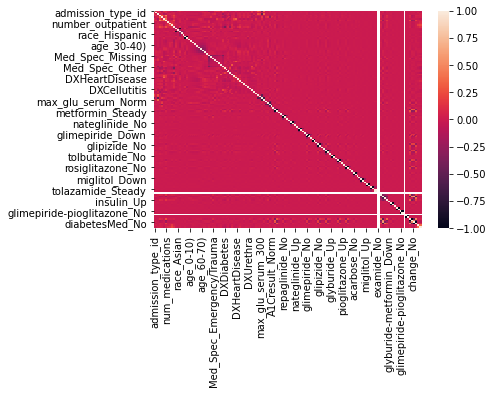

In [62]:
sb.heatmap(data_new.corr())

In [63]:
data_new.describe()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,age_0-10),age_10-20),age_20-30),age_30-40),age_40-50),age_50-60),age_60-70),...,tolazamide_Steady,tolazamide_Up,examide_No,citoglipton_No,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_No,glipizide-metformin_Steady,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,readmitted30,readmittedYN
count,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,...,99492.000000,99492.00000,99492.0,99492.0,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.00000,99492.00000,99492.0,99492.00000,99492.00000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000
mean,2.027238,3.740884,5.770997,4.398454,43.072971,1.340540,16.026545,0.373357,0.201343,0.643107,7.439251,0.193081,0.006443,0.764876,0.020474,0.015127,0.538486,0.461514,0.001608,0.006855,0.016192,0.037179,0.095133,0.169813,0.221003,...,0.000382,0.00001,1.0,1.0,0.121005,0.467324,0.300547,0.111125,0.000030,0.993165,0.006744,0.000060,0.999869,0.000131,0.99999,0.00001,1.0,0.99999,0.00001,0.461444,0.538556,0.231184,0.768816,0.112260,0.464118
std,1.450861,5.309413,4.072906,2.986972,19.695587,1.703686,8.119809,1.276805,0.939981,1.271370,1.926043,0.394718,0.080008,0.424079,0.141616,0.122058,0.498519,0.498519,0.040070,0.082510,0.126215,0.189201,0.293400,0.375470,0.414924,...,0.019540,0.00317,0.0,0.0,0.326134,0.498934,0.458498,0.314288,0.005491,0.082390,0.081846,0.007766,0.011430,0.011430,0.00317,0.00317,0.0,0.00317,0.00317,0.498514,0.498514,0.421592,0.421592,0.315688,0.498713
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,1.0,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.00000,0.00000,1.0,1.00000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.00000,0.00000,1.0,1.00000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.0,1.0,0.000000,1.000000,1.000000,0.000000,0.000000,1.0

In [64]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99492 entries, 0 to 101765
Columns: 141 entries, admission_type_id to readmittedYN
dtypes: int32(16), int64(22), object(4), uint8(99)
memory usage: 36.0+ MB


In [65]:
data_new = data_new.select_dtypes(include=['int32', 'int64'])

# create X dataframe without readmitted output column
X = data_new.drop(['readmitted30', 'readmittedYN'], axis=1)

# create y dataframe with readmitted output column
y = data_new['readmitted30']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [66]:
data_new.columns

Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'Med_Spec_Missing',
       'Med_Spec_InternalMedicine', 'Med_Spec_Emergency/Trauma',
       'Med_Spec_Family/GeneralPractice', 'Med_Spec_Cardiology',
       'Med_Spec_Surgery-General', 'Med_Spec_Nephrology', 'Med_Spec_Other',
       'DXDiabetes', 'DXLipid', 'DXFluid', 'DXHypertension', 'DXHTN_Kidney',
       'DXHeartAttack', 'DXHeartDisease', 'DXDysrhythm', 'DXHeartFailure',
       'DXCVD', 'DXPneumonia', 'DXAirway', 'DXUrethra', 'DXCellutitis',
       'DXOsteo', 'DXResp', 'DXDevice', 'readmitted30', 'readmittedYN'],
      dtype='object')

In [67]:
cols = X.columns
cols

Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'Med_Spec_Missing',
       'Med_Spec_InternalMedicine', 'Med_Spec_Emergency/Trauma',
       'Med_Spec_Family/GeneralPractice', 'Med_Spec_Cardiology',
       'Med_Spec_Surgery-General', 'Med_Spec_Nephrology', 'Med_Spec_Other',
       'DXDiabetes', 'DXLipid', 'DXFluid', 'DXHypertension', 'DXHTN_Kidney',
       'DXHeartAttack', 'DXHeartDisease', 'DXDysrhythm', 'DXHeartFailure',
       'DXCVD', 'DXPneumonia', 'DXAirway', 'DXUrethra', 'DXCellutitis',
       'DXOsteo', 'DXResp', 'DXDevice'],
      dtype='object')

In [68]:
pca = PCA(n_components=0.9)
m = pca.fit_transform(X_scaled)

In [69]:
df = pd.DataFrame(m)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,-3.180344,-0.856392,2.370045,-1.286193,-0.533675,1.360866,-1.259866,-0.531318,-0.107570,0.957800,0.392917,0.702796,0.925721,-0.050983,-0.151732,-0.752638,-1.640661,0.324139,-1.440587,-0.613009,-1.380899,-0.195241,-0.741406,2.154132,-1.915458,0.119452,-1.483292,-0.601861,1.091004
1,0.923318,1.545651,-0.524568,-0.615414,-0.405907,-0.857432,-0.064430,-0.203326,-1.488127,0.809659,-0.040736,-0.345076,-0.606611,-0.300521,-0.230136,0.245630,-0.584744,0.188007,0.967657,-1.323824,0.249072,0.071473,-0.084010,-0.841256,0.030585,0.381952,-0.118004,0.261861,0.124042
2,-1.388170,-0.262158,-1.163599,-1.193036,1.083959,-0.289608,0.843056,-0.144253,0.159412,-0.194008,-0.284171,-0.247557,0.077434,-0.564881,-0.822771,0.131589,0.200513,0.578760,-0.071019,0.430696,0.697827,0.422775,0.326797,0.513781,-0.925431,-0.269953,1.297038,0.353056,-0.548133
3,0.371605,0.666482,-0.161312,-0.381508,1.913993,-1.629744,-0.978978,-1.235951,0.030352,-0.300470,0.185603,-0.181283,-0.031050,-0.021642,0.130698,0.191122,-0.410598,-0.092458,0.748079,0.359757,0.018636,-0.230147,0.580218,-0.315474,-0.193050,-0.655383,0.477524,-2.827646,0.954541
4,-1.865341,1.290938,-0.914169,-0.840054,-0.150639,-0.921986,0.258299,-0.640135,0.247721,-0.457849,0.093188,-0.301163,0.241063,-0.411158,-0.636205,-0.269731,0.055268,0.244479,-0.023893,0.228602,-0.052606,0.664709,0.599026,-0.431604,-1.128045,0.519039,0.907260,-0.079773,0.329041


In [70]:
pca.explained_variance_ratio_

array([0.0705388 , 0.05920624, 0.04610183, 0.0434129 , 0.04060324,
       0.03739956, 0.03381278, 0.03363495, 0.03272204, 0.0304351 ,
       0.03009511, 0.0290754 , 0.02838224, 0.02800215, 0.02761478,
       0.02710066, 0.02676646, 0.02630004, 0.02600977, 0.02573267,
       0.02509017, 0.0247855 , 0.0237546 , 0.02341347, 0.02314717,
       0.02241878, 0.02172758, 0.02001022, 0.0194906 ])

In [71]:
print(pca.components_)

[[-0.12194244  0.10095629  0.07268236 ... -0.1242265  -0.13282455
   0.04667896]
 [-0.22669094 -0.07186222  0.19562609 ... -0.15302708  0.08441552
  -0.11676862]
 [ 0.18423429  0.09876111 -0.08048934 ...  0.19851804 -0.16518936
   0.11785602]
 ...
 [-0.07799592  0.01052963 -0.05407704 ...  0.46089778 -0.13260121
   0.07207682]
 [ 0.01097846 -0.02456139 -0.03250826 ... -0.03684863  0.09437137
   0.08830527]
 [-0.03431773  0.13322387 -0.01782983 ... -0.05244457 -0.0773128
   0.0576765 ]]


In [72]:
print(m[0:5,:])

[[-3.18034372 -0.85639221  2.37004455 -1.28619319 -0.53367505  1.36086567
  -1.25986585 -0.53131825 -0.10756979  0.95780047  0.39291692  0.70279559
   0.92572123 -0.05098348 -0.15173185 -0.75263779 -1.64066075  0.32413932
  -1.44058671 -0.61300902 -1.38089949 -0.19524114 -0.74140624  2.15413215
  -1.91545798  0.11945162 -1.48329169 -0.60186139  1.09100357]
 [ 0.92331808  1.54565054 -0.5245675  -0.61541402 -0.40590684 -0.85743174
  -0.06442959 -0.20332585 -1.48812707  0.80965868 -0.04073558 -0.34507609
  -0.60661093 -0.30052117 -0.23013625  0.24563    -0.58474447  0.18800668
   0.96765748 -1.32382416  0.24907196  0.07147296 -0.08401013 -0.8412557
   0.03058496  0.38195226 -0.1180045   0.26186101  0.12404193]
 [-1.38817007 -0.26215752 -1.16359887 -1.19303572  1.08395886 -0.28960811
   0.84305624 -0.14425339  0.15941182 -0.19400768 -0.28417108 -0.24755678
   0.07743421 -0.56488124 -0.82277134  0.1315891   0.20051258  0.5787595
  -0.07101903  0.43069649  0.69782687  0.42277456  0.32679737 

In [73]:
pdf = pd.concat([df[[0,1]], data_prep[['readmitted30']]], axis = 1)

In [74]:
print(pdf.head())
pdf.readmitted30.value_counts()

          0         1  readmitted30
0 -3.180344 -0.856392           0.0
1  0.923318  1.545651           0.0
2 -1.388170 -0.262158           0.0
3  0.371605  0.666482           0.0
4 -1.865341  1.290938           0.0


0.0    88323
1.0    11169
Name: readmitted30, dtype: int64

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = pdf['readmitted30'] == target
    ax.scatter(pdf.loc[indicesToKeep, 0], pdf.loc[indicesToKeep, 1], c = color, s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
from collections import Counter
print("readmitted30")
print(Counter(data_new['readmitted30']))
print(" ")
print("readmittedYN")
print(Counter(data_new['readmittedYN']))

In [ ]:
most_important = [np.abs(pca.components_[i]).argmax() for i in range(pca.components_.shape[0])]

# Need to reselect feature_names

In [ ]:
feature_names = cols

In [ ]:
most_important_names = [feature_names[most_important[i]] for i in range(pca.components_.shape[0])]

In [ ]:
most_important_names

# Feature selection

['number_diagnoses',
 'num_procedures',
 'Med_Spec_Cardiology',
 'Med_Spec_Nephrology',
 'Med_Spec_Family/GeneralPractice',
 'Med_Spec_Emergency/Trauma',
 'number_emergency',
 'DXHeartFailure',
 'Med_Spec_Surgery-General',
 'DXPneumonia',
 'Med_Spec_Family/GeneralPractice',
 'DXCVD',
 'DXResp',
 'DXCVD',
 'DXLipid',
 'DXUrethra',
 'DXLipid',
 'DXDevice',
 'number_outpatient',
 'DXDevice',
 'discharge_disposition_id',
 'DXHypertension',
 'DXHeartAttack',
 'discharge_disposition_id',
 'DXOsteo',
 'DXHeartDisease',
 'number_inpatient',
 'num_lab_procedures']

In [ ]:
xvector = pca.components_[0]
yvector = pca.components_[1]

In [ ]:
xs = m[:,0]
ys = m[:,1]

In [ ]:
# scalex = 1.0/(xs.max() - xs.min())
# scaley = 1.0/(ys.max() - ys.min())
# classes = np.unique(pdf['readmitted'])
# colors = ['g','r','w']
# for s, l in enumerate(classes):
#    plt.scatter(xs, ys, c = colors[s])

for i in range(len(xvector)):
# arrows project features as vectors onto PC axes
    plt.arrow(0, 0, xvector[i], yvector[i], color='k', alpha=0.5)
    plt.text(xvector[i]*1.15, yvector[i]*1.15, feature_names[i], color='g')

plt.xlim(-.5,1)
plt.ylim(-.5,1)

plt.show()

In [ ]:
#data_new = data_new.drop(['readmitted','encounter_id','patient_nbr','weight','payer_code','medical_specialty',
#                          'diag_1','diag_2','diag_3'], axis=1)

In [ ]:
import seaborn as sb
sb.heatmap(data_new.corr())

In [ ]:
data_new.head()

In [ ]:
X = data_new.drop(['readmitted30', 'readmittedYN'],axis=1)
X = X.values

In [ ]:
y = data_new['readmitted30'].values

In [ ]:
def select_features(x,y):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(x,y)
    x_fs = fs.transform(x)
    return x_fs, fs

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
oe = OrdinalEncoder()
oe.fit(X)
X_enc = oe.transform(X)

In [ ]:
le = LabelEncoder()
le.fit(y)
y_enc = le.transform(y)

In [ ]:
X_fs, fs = select_features(X_enc,y_enc)

In [ ]:
for i in range(len(fs.scores_)):
    print('Feature %s: %f' % (data_new.columns[i], fs.scores_[i]))

# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

# Feature selection

Feature admission_type_id: 9.004781

Feature discharge_disposition_id: 849.999515

Feature admission_source_id: 3.148871

Feature time_in_hospital: 339.439159

Feature num_lab_procedures: 51.078492

Feature num_procedures: 11.313117

Feature num_medications: 301.140740

Feature number_outpatient: 58.863298

Feature number_emergency: 1209.088188

Feature number_inpatient: 4011.345217

Feature number_diagnoses: 119.563403

Feature Med_Spec_Missing: nan

Feature Med_Spec_InternalMedicine: 3.595612

Feature Med_Spec_Emergency/Trauma: 1.149243

Feature Med_Spec_Family/GeneralPractice: 8.896960

Feature Med_Spec_Cardiology: 41.854654

Feature Med_Spec_Surgery-General: 0.100990

Feature Med_Spec_Nephrology: 37.646395

Feature Med_Spec_Other: 11.392142

Feature DXDiabetes: 95.137843

Feature DXLipid: 24.359704

Feature DXFluid: 7.187711

Feature DXHypertension: 68.440958

Feature DXHTN_Kidney: 110.479924

Feature DXHeartAttack: 1.901142

Feature DXHeartDisease: 35.795214

Feature DXDysrhythm: 0.744094

Feature DXHeartFailure: 40.409050

Feature DXCVD: 0.088283

Feature DXPneumonia: 9.813223

Feature DXAirway: 6.669752

Feature DXUrethra: 2.299106

Feature DXCellutitis: 0.210196

Feature DXOsteo: 0.193165

Feature DXResp: 33.635795

Feature DXDevice: 22.939349

# Oversampling train

In [ ]:
# import needed libraries
from sklearn.model_selection import train_test_split

# split data into train and test

# create X dataframe without readmitted output column
X = data_prep.drop(['readmitted30', 'readmittedYN', 'readmitted', 
                    'FreeText_diag_1', 'FreeText_diag_2', 'FreeText_diag_3'], axis=1)   

#X = X.values

# create y dataframe with readmitted output column
y = data_prep['readmitted30']

In [ ]:
list(X.columns)

In [ ]:
# import needed libraries
from sklearn.model_selection import train_test_split



# perform train and test split while setting a random state seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print shape of both train and split 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
#! pip install imblearn
# import SMOTE

from imblearn.over_sampling import SMOTE

In [ ]:
# transform the dataset due to the imbalance issue using SMOTE

# sampling strategy allows us to pick ratio of minority oversampling over majority. 1.0 = 50/50
oversample = SMOTE(sampling_strategy='auto')

# fit x_train and y_train to oversampling object
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()

In [ ]:
y_train_smote.value_counts()

In [ ]:
# Saving final datasets for importing into separate model Jupyter notebooks

import pickle

pickle.dump(X, open("X.p", "wb"))

pickle.dump(X_train_smote, open("X_train_smote.p", "wb"))
pickle.dump(X_test, open("X_test.p", "wb"))
pickle.dump(y_train_smote, open("y_train_smote.p", "wb"))
pickle.dump(y_test, open("y_test.p", "wb"))

# To load datasets in a new Jupyter notebook:

import pickle

X_train_smote = pickle.load(open("X_train_smote.p", "rb" ))

X_test = pickle.load(open("X_test.p", "rb" ))

y_train_smote = pickle.load(open("y_train_smote.p", "rb" ))

y_test = pickle.load(open("y_test.p", "rb" ))

# Changing to undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy=1.0)

X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()

In [ ]:
y_train_under.value_counts()

In [ ]:
# Saving final datasets for importing into separate model Jupyter notebooks

import pickle


pickle.dump(X_train_under, open("X_train_under.p", "wb"))
pickle.dump(X_test, open("X_test.p", "wb"))
pickle.dump(y_train_under, open("y_train_under.p", "wb"))
pickle.dump(y_test, open("y_test.p", "wb"))

# To load datasets in a new Jupyter notebook:

import pickle

X_train_under = pickle.load(open("X_train_under.p", "rb" ))

X_test = pickle.load(open("X_test.p", "rb" ))

y_train_under = pickle.load(open("y_train_under.p", "rb" ))

y_test = pickle.load(open("y_test.p", "rb" ))